In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


from csv import writer


In [2]:
import pandas as pd
df=pd.read_csv('loan_approval_dataset_4269.csv')
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns = df.columns.str.strip()
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()
df.drop(columns=['loan_id'], inplace=True)
conData=0
df=df.fillna(conData)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [4]:
print(sum(df['loan_status']=='Approved')/len(df) )
print(sum(df['loan_status']=='Rejected')/len(df) )

0.622159756383228
0.3778402436167721


In [5]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'education' column
df['education'] = label_encoder.fit_transform(df['education'])

# Apply label encoding to the 'self_employed' column
df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
#df['self_employed'] = df['self_employed'].replace(['Yes', 'No'], [1,0])

# Apply label encoding to the 'loan_status' column
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
#df['loan_status'] = df['loan_status'].replace(['Approved', 'Rejected'], [1,0])

# Display the updated DataFrame with encoded columns
print(df[['education', 'self_employed','loan_status']])

      education  self_employed  loan_status
0             0              0            0
1             1              1            1
2             0              0            1
3             0              0            1
4             1              1            1
...         ...            ...          ...
4264          0              1            1
4265          1              1            0
4266          1              0            1
4267          1              0            0
4268          0              0            0

[4269 rows x 3 columns]


In [6]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [7]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.boxplot(x='loan_status', y='cibil_score', data=df)

In [8]:
#sns.scatterplot(x='cibil_score', y='loan_amount', hue='loan_status', data=df)

In [9]:
#df['cibil_grp'] = np.where((df['cibil_score']>=300) & (df['cibil_score']<=500),"1",
#                           np.where((df['cibil_score']>500)& (df['cibil_score']<600),"2","3"))

In [10]:
# Define the feature columns (X) and target column (y)
x = df.drop(columns=['loan_status'])  # Drop 'loan_status' column to get feature columns
y = df['loan_status']  # T
x[x < 0]=0
x

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [11]:
x = x.drop(columns=['self_employed'])
x = x.drop(columns=['education'])

In [12]:
#sns.countplot(x='cibil_grp',hue='loan_status',data=df)

In [13]:
x

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state=0)

{'priors': None, 'var_smoothing': 1e-09}
[[524  12]
 [183 135]]


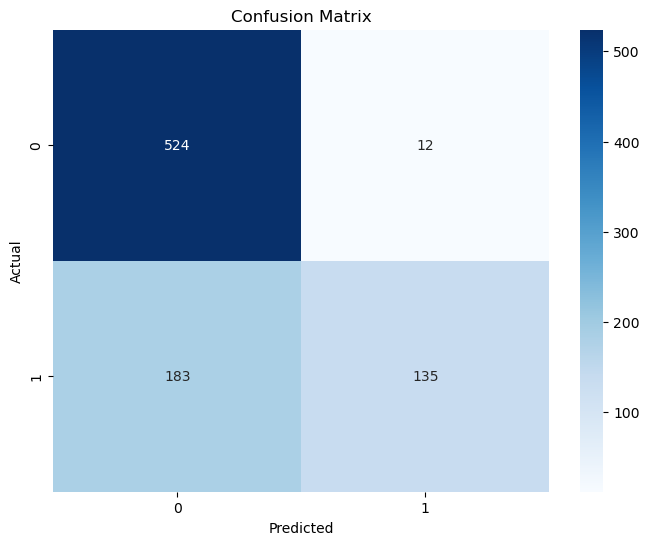

GaussianNB Classifier Metrics:
AUC: 0.70107012109265
Accuracy: 0.7716627634660421
Precision: 0.807145767389433
Recall: 0.7716627634660421
Specificity: 0.6304774787192579
F1 Score: 0.7453843966341451
GaussianNB Report:
               precision    recall  f1-score   support

           0       0.74      0.98      0.84       536
           1       0.92      0.42      0.58       318

    accuracy                           0.77       854
   macro avg       0.83      0.70      0.71       854
weighted avg       0.81      0.77      0.75       854

----------------------------------
524 12 183 135
pod:  0.42452830188679247
pof:  0.022388059701492536
AUC:  0.70107012109265
accuracy:  0.7716627634660421
precision:  0.9183673469387755
recall:  0.42452830188679247
specificity:  0.9776119402985075
F1:  0.5806451612903226


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a GaussianNB instance
gaussian_nb = GaussianNB(priors=None, var_smoothing=1e-09)



# Print all parameter
print(gaussian_nb.get_params())
    
    
# Train the logistic regression model
gaussian_nb.fit(x_train, y_train)

# Predict on the test set
y_pred = gaussian_nb.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')



# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("GaussianNB Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("GaussianNB Report:\n", classification_rep)

print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_4269', 'RAW', 'NB', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_4269.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'C': 8, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


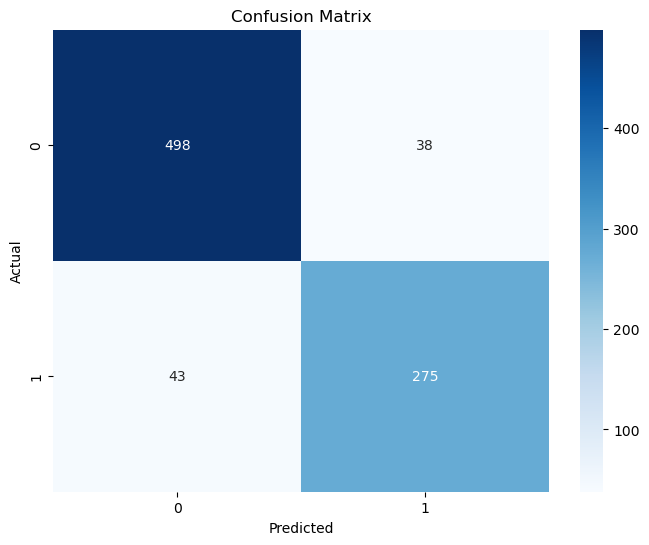

LogisticRegression Classifier Metrics:
AUC: 0.8969421759128883
Accuracy: 0.905152224824356
Precision: 0.9049067721845864
Recall: 0.905152224824356
Specificity: 0.8887321270014208
F1 Score: 0.9049966078550483
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

----------------------------------
498 38 43 275
pod:  0.8647798742138365
pof:  0.0708955223880597
AUC:  0.8969421759128884
accuracy:  0.905152224824356
precision:  0.8785942492012779
recall:  0.8647798742138365
specificity:  0.9291044776119403
F1:  0.8716323296354992


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a LogisticRegression instance
#logistic_reg = LogisticRegression(random_state=42)
#logistic_reg = LogisticRegression(C=100, penalty='l1', solver='liblinear')
logistic_reg = LogisticRegression(C=8, multi_class='ovr', penalty='l1', solver='liblinear')

# Print all parameter
print(logistic_reg.get_params())

# Train the logistic regression model
logistic_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(x_test)



# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

 

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("LogisticRegression Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 

# Print the classification report
print("Classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_4269', 'RAW', 'LR', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_4269.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


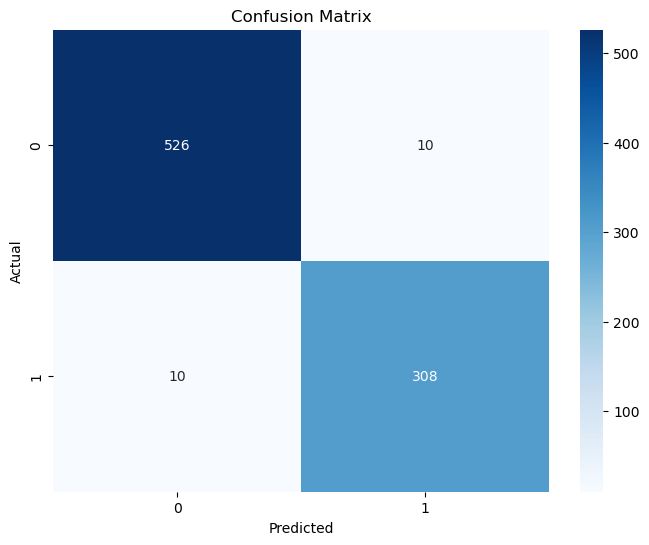

Decision Tree Classifier Metrics:
AUC: 0.9749483713507932
Accuracy: 0.9765807962529274
Precision: 0.9765807962529274
Recall: 0.9765807962529274
Specificity: 0.9733159464486589
F1 Score: 0.9765807962529274
GaussianNB Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

----------------------------------
526 10 10 308
pod:  0.9685534591194969
pof:  0.018656716417910446
AUC:  0.9749483713507932
accuracy:  0.9765807962529274
precision:  0.9685534591194969
recall:  0.9685534591194969
specificity:  0.9813432835820896
F1:  0.9685534591194969


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Print all parameter
print(decision_tree.get_params())
    
# Train the decision tree model
decision_tree.fit(x_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("GaussianNB Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_4269', 'RAW', 'DTree', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_4269.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


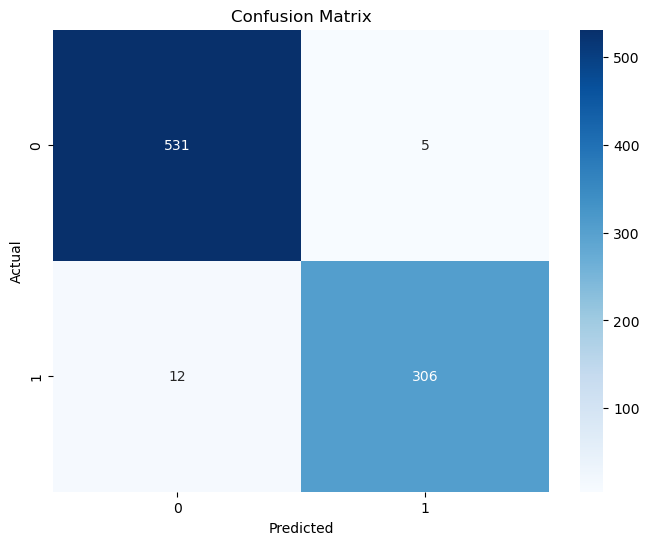

RandomForest Classifier Metrics:
AUC: 0.9764678963672206
Accuracy: 0.9800936768149883
Precision: 0.9801430397420031
Recall: 0.9800936768149883
Specificity: 0.9728421159194527
F1 Score: 0.9800474813313051
GaussianNB Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

----------------------------------
531 5 12 306
pod:  0.9622641509433962
pof:  0.009328358208955223
AUC:  0.9764678963672205
accuracy:  0.9800936768149883
precision:  0.9839228295819936
recall:  0.9622641509433962
specificity:  0.9906716417910447
F1:  0.972972972972973


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a RandomForestClassifier instance
random_forest = RandomForestClassifier(random_state=42)
#random_forest = RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100)

 
# Print all parameter
print(random_forest.get_params())
 

# Train the random forest model
random_forest.fit(x_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("RandomForest Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("GaussianNB Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_4269', 'RAW', 'RF', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_4269.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_

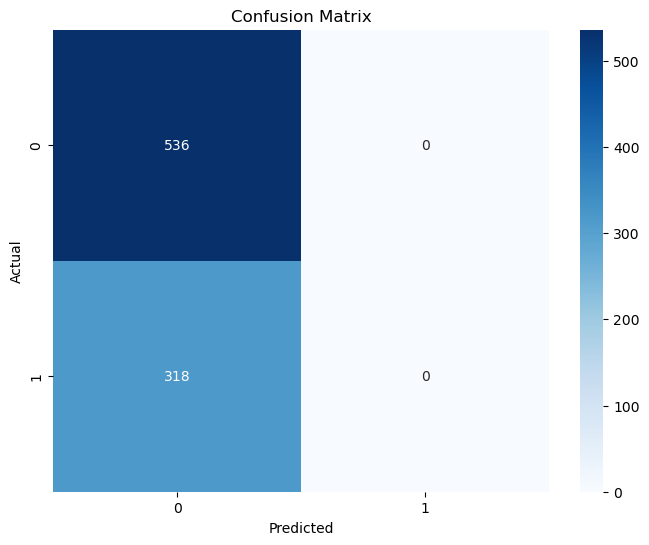

SVC Classifier Metrics:
AUC: 0.5
Accuracy: 0.6276346604215457
Precision: 0.393925266962469
Recall: 0.6276346604215457
Specificity: 0.37236533957845436
F1 Score: 0.4840462992603575
GaussianNB Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       536
           1       0.00      0.00      0.00       318

    accuracy                           0.63       854
   macro avg       0.31      0.50      0.39       854
weighted avg       0.39      0.63      0.48       854

----------------------------------
536 0 318 0
pod:  0.0
pof:  0.0
AUC:  0.5
accuracy:  0.6276346604215457
precision:  nan
recall:  0.0
specificity:  1.0
F1:  nan


C:\Users\Joy\AppData\Local\Temp\ipykernel_38832\3077658030.py:76: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_val=tp/(tp+fp)


In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create an SVC (Support Vector Classification) instance
svm_classifier = SVC(C=1)

#Print parameters
print(svm_classifier.get_params())

# Train the SVM model
svm_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVC Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("GaussianNB Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_4269', 'RAW', 'SVM', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_4269.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


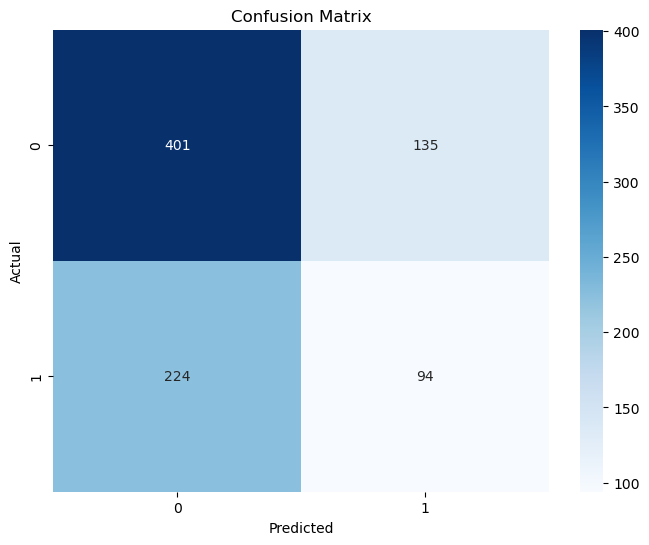

KNeighbors Classifier Metrics:
AUC: 0.5218659063174692
Accuracy: 0.5796252927400468
Precision: 0.555539052800589
Recall: 0.5796252927400468
Specificity: 0.46410651989489166
F1 Score: 0.5615391724937362
KNeighbors Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69       536
           1       0.41      0.30      0.34       318

    accuracy                           0.58       854
   macro avg       0.53      0.52      0.52       854
weighted avg       0.56      0.58      0.56       854

----------------------------------
401 135 224 94
pod:  0.29559748427672955
pof:  0.251865671641791
AUC:  0.5218659063174692
accuracy:  0.5796252927400468
precision:  0.4104803493449782
recall:  0.29559748427672955
specificity:  0.7481343283582089
F1:  0.3436928702010969


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNeighborsClassifier instance with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
#knn_classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=27)

print(knn_classifier.get_params())

# Train the KNN model
knn_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("KNeighbors Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("KNeighbors Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_4269', 'RAW', 'KNN', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_4269.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


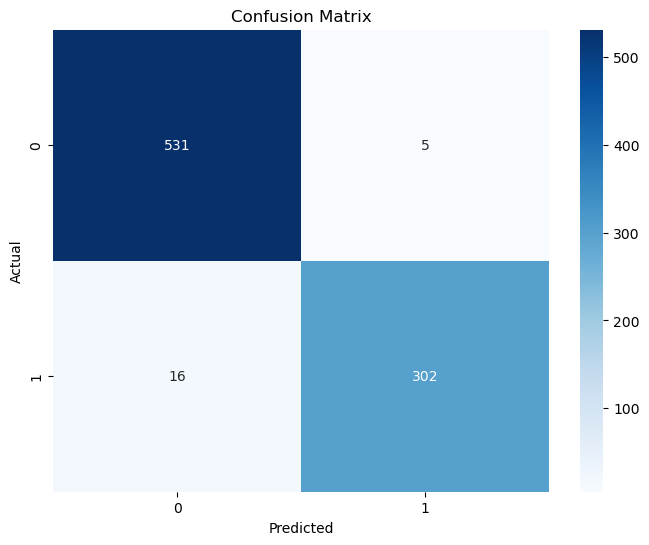

GradientBoosting Classifier Metrics:
AUC: 0.9701785881911199
Accuracy: 0.9754098360655737
Precision: 0.9755768172517093
Recall: 0.9754098360655737
Specificity: 0.964947340316666
F1 Score: 0.9753183234185551
GradientBoostingClassifier Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       536
           1       0.98      0.95      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

----------------------------------
531 5 16 302
pod:  0.949685534591195
pof:  0.009328358208955223
AUC:  0.9701785881911199
accuracy:  0.9754098360655737
precision:  0.9837133550488599
recall:  0.949685534591195
specificity:  0.9906716417910447
F1:  0.9663999999999999


In [21]:
 # Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
 
# Initialize GradientBoosting classifier
#gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(min_samples_leaf=2, n_estimators=50)

#Print parameters
print(gb_clf.get_params())

# Train GradientBoosting classifier
gb_clf.fit(x_train, y_train)
  

# Predict on the test set
y_pred = gb_clf.predict(x_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("GradientBoosting Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("GradientBoostingClassifier Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)


List = ['Bank_loan_4269', 'RAW', 'GB', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_4269.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


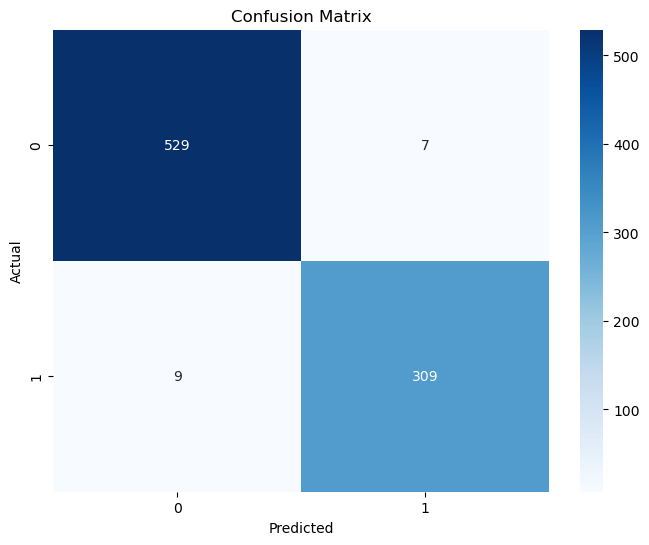

XGB Classifier Metrics:
AUC: 0.979319205857505
Accuracy: 0.9812646370023419
Precision: 0.981251936125998
Recall: 0.9812646370023419
Specificity: 0.977373774712668
F1 Score: 0.9812525304286691
  Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       536
           1       0.98      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

----------------------------------
529 7 9 309
pod:  0.9716981132075472
pof:  0.013059701492537313
AUC:  0.979319205857505
accuracy:  0.9812646370023419
precision:  0.9778481012658228
recall:  0.9716981132075472
specificity:  0.9869402985074627
F1:  0.9747634069400631


In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBClassifier instance
xgb_classifier = XGBClassifier(random_state=42)

#Print parameters
print(xgb_classifier.get_params())

# Train the XGBoost model
xgb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("XGB Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("  Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_4269', 'RAW', 'XGB', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_4269.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

Epoch 1/30
86/86 [==============================] - 2s 6ms/step - loss: 63797.4883 - accuracy: 0.5275 - val_loss: 27322.5977 - val_accuracy: 0.6223
Epoch 2/30
86/86 [==============================] - 0s 3ms/step - loss: 11989.8535 - accuracy: 0.5315 - val_loss: 17804.5449 - val_accuracy: 0.6223
Epoch 3/30
86/86 [==============================] - 0s 3ms/step - loss: 5463.9097 - accuracy: 0.5278 - val_loss: 10013.1240 - val_accuracy: 0.6223
Epoch 4/30
86/86 [==============================] - 0s 3ms/step - loss: 3272.2705 - accuracy: 0.5406 - val_loss: 2150.9089 - val_accuracy: 0.6091
Epoch 5/30
86/86 [==============================] - 0s 3ms/step - loss: 3524.7803 - accuracy: 0.5476 - val_loss: 2260.0005 - val_accuracy: 0.5974
Epoch 6/30
86/86 [==============================] - 0s 3ms/step - loss: 1466.1204 - accuracy: 0.5351 - val_loss: 1670.7096 - val_accuracy: 0.4290
Epoch 7/30
86/86 [==============================] - 0s 3ms/step - loss: 845.1912 - accuracy: 0.5271 - val_loss: 653.084

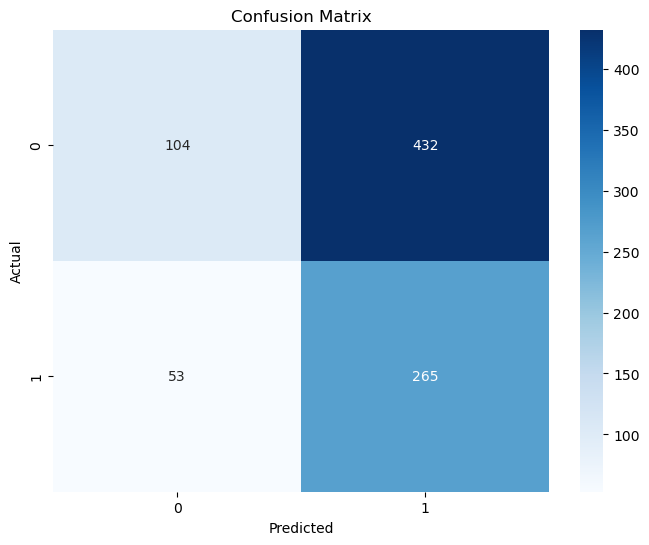

FNN   Metrics:
AUC: 0.513681592039801
Accuracy: 0.43208430913348944
Precision: 0.5573316142685996
Recall: 0.43208430913348944
Specificity: 0.5952788749461125
F1 Score: 0.38281803976708284
GaussianNB Report:
               precision    recall  f1-score   support

           0       0.66      0.19      0.30       536
           1       0.38      0.83      0.52       318

    accuracy                           0.43       854
   macro avg       0.52      0.51      0.41       854
weighted avg       0.56      0.43      0.38       854

----------------------------------
104 432 53 265
pod:  0.8333333333333334
pof:  0.8059701492537313
AUC:  0.513681592039801
accuracy:  0.43208430913348944
precision:  0.3802008608321377
recall:  0.8333333333333334
specificity:  0.19402985074626866
F1:  0.522167487684729


In [23]:
#FNN
 
from keras.models import Sequential
from keras.layers import Dense
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#create model

#x_train, x_test, y_train, y_test 

model = Sequential()
#get number of columns in training data
n_cols = x_test.shape[1]
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#compile model using mse as a measure of model performance
#model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
#train model
 
model.fit(x_train, y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])
# Predict on the test set
y_pred_step1 = model.predict(x_test)
y_pred=y_pred_step1.round()


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("FNN   Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("GaussianNB Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_4269', 'RAW', 'FNN', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_4269.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

Epoch 1/100
107/107 [==============================] - 4s 7ms/step - loss: 0.5457
Epoch 2/100
107/107 [==============================] - 1s 6ms/step - loss: 0.3846
Epoch 3/100
107/107 [==============================] - 1s 7ms/step - loss: 0.3284
Epoch 4/100
107/107 [==============================] - 1s 7ms/step - loss: 0.3128
Epoch 5/100
107/107 [==============================] - 1s 6ms/step - loss: 0.2883
Epoch 6/100
107/107 [==============================] - 1s 7ms/step - loss: 0.2753
Epoch 7/100
107/107 [==============================] - 1s 7ms/step - loss: 0.2701
Epoch 8/100
107/107 [==============================] - 1s 6ms/step - loss: 0.2604
Epoch 9/100
107/107 [==============================] - 1s 6ms/step - loss: 0.2498
Epoch 10/100
107/107 [==============================] - 1s 6ms/step - loss: 0.2464
Epoch 11/100
107/107 [==============================] - 1s 6ms/step - loss: 0.2464
Epoch 12/100
107/107 [==============================] - 1s 7ms/step - loss: 0.2425
Epoch 13/100


107/107 [==============================] - 1s 7ms/step - loss: 0.2286
Epoch 100/100
27/27 [==============================] - 1s 2ms/step


C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_

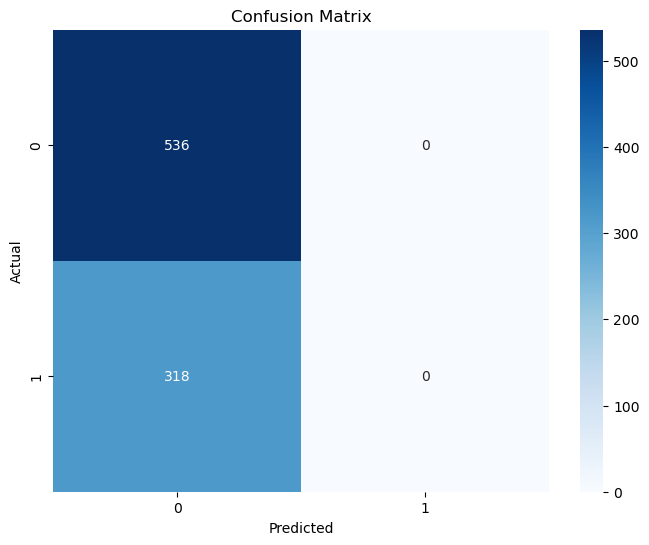

RNN Metrics:
AUC: 0.5
Accuracy: 0.6276346604215457
Precision: 0.393925266962469
Recall: 0.6276346604215457
Specificity: 0.37236533957845436
F1 Score: 0.4840462992603575
RNN Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       536
           1       0.00      0.00      0.00       318

    accuracy                           0.63       854
   macro avg       0.31      0.50      0.39       854
weighted avg       0.39      0.63      0.48       854

----------------------------------
536 0 318 0
pod:  0.0
pof:  0.0
AUC:  0.5
accuracy:  0.6276346604215457
precision:  nan
recall:  0.0
specificity:  1.0
F1:  nan


C:\Users\Joy\AppData\Local\Temp\ipykernel_38832\4265600048.py:95: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_val=tp/(tp+fp)


In [24]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
model = Sequential()

#Adding the first RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(units = 1))

#Compile the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Predict on the test set
y_pred_step1 = model.predict(x_test)
y_pred=y_pred_step1.round()


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("RNN Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("RNN Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_4269', 'RAW', 'RNN-1', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_4269.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


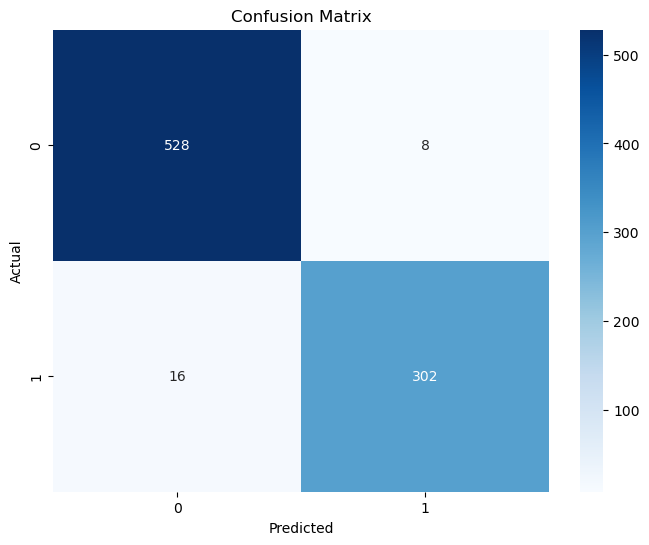

ExtraTreesClassifier Metrics:
AUC: 0.9673800807284332
Accuracy: 0.9718969555035128
Precision: 0.9719307289282715
Recall: 0.9718969555035128
Specificity: 0.9628632059533537
F1 Score: 0.9718220405700828
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       536
           1       0.97      0.95      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

----------------------------------
528 8 16 302
pod:  0.949685534591195
pof:  0.014925373134328358
AUC:  0.9673800807284333
accuracy:  0.9718969555035128
precision:  0.9741935483870968
recall:  0.949685534591195
specificity:  0.9850746268656716
F1:  0.961783439490446


In [25]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)



print(et_clf.get_params())

et_clf.fit(x_train, y_train)
# Predict on the test set
y_pred = et_clf.predict(x_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("ExtraTreesClassifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("Classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_4269', 'RAW', 'ExtraTrees', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_4269.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

C:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Decision Tree Classifier Accuracy: 0.9765807962529274
Random Forest Classifier Accuracy: 0.9800936768149883
Bagging Classifier with RF Tree Accuracy: 0.977751756440281
Voting Classifier Accuracy: 0.977751756440281


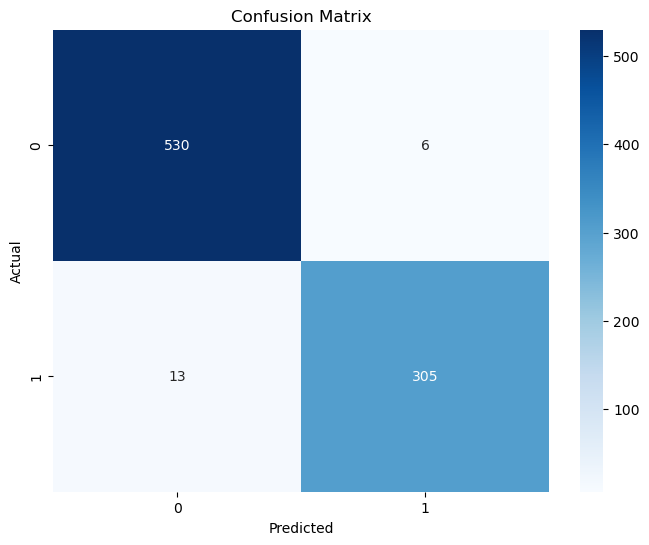

Bagging Classifier Metrics:
AUC: 0.9739627335022999
Accuracy: 0.977751756440281
Precision: 0.9777898586012511
Recall: 0.977751756440281
Specificity: 0.9701737105643186
F1 Score: 0.9777001261938115
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854

----------------------------------
530 6 13 305
pod:  0.9591194968553459
pof:  0.011194029850746268
AUC:  0.9739627335022999
accuracy:  0.977751756440281
precision:  0.9807073954983923
recall:  0.9591194968553459
specificity:  0.9888059701492538
F1:  0.9697933227344993


In [26]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Initialize base classifiers
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Bagging classifier with Decision Tree as base estimator
bagging_dt_clf = BaggingClassifier(base_estimator=rf_clf, n_estimators=100, random_state=42)

# Initialize Voting classifier with Decision Tree and Random Forest as base estimators
voting_clf = VotingClassifier(estimators=[('dt', dt_clf), ('rf', rf_clf)], voting='hard')

# Train classifiers
dt_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)
bagging_dt_clf.fit(x_train, y_train)
voting_clf.fit(x_train, y_train)

# Make predictions
dt_predictions = dt_clf.predict(x_test)
rf_predictions = rf_clf.predict(x_test)
bagging_dt_predictions = bagging_dt_clf.predict(x_test)
voting_predictions = voting_clf.predict(x_test)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
bagging_dt_accuracy = accuracy_score(y_test, bagging_dt_predictions)
voting_accuracy = accuracy_score(y_test, voting_predictions)

print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Bagging Classifier with RF Tree Accuracy:", bagging_dt_accuracy)
print("Voting Classifier Accuracy:", voting_accuracy)


y_pred=bagging_dt_predictions

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Bagging Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("Classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)


List = ['Bank_loan_4269', 'RAW', 'Bagging', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_4269.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

C:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


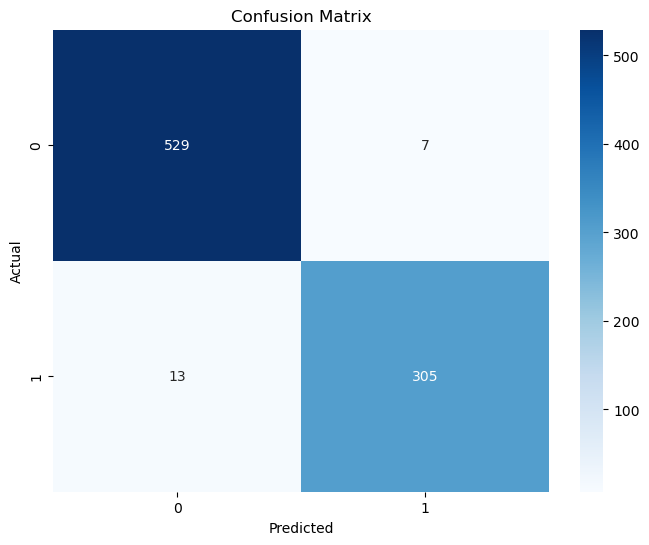

AdaBoost Classifier Metrics:
AUC: 0.9730298976814044
Accuracy: 0.9765807962529274
Precision: 0.9765916815626451
Recall: 0.9765807962529274
Specificity: 0.9694789991098811
F1 Score: 0.976534450271486
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

----------------------------------
529 7 13 305
pod:  0.9591194968553459
pof:  0.013059701492537313
AUC:  0.9730298976814044
accuracy:  0.9765807962529274
precision:  0.9775641025641025
recall:  0.9591194968553459
specificity:  0.9869402985074627
F1:  0.9682539682539683


In [27]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

 
# Initialize base estimator (Decision Tree)
dt_clf = DecisionTreeClassifier(max_depth=1, random_state=42)

rf_clf = RandomForestClassifier(max_depth=100, random_state=42)

svm_clf = SVC(random_state=42)


# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier(base_estimator=rf_clf, n_estimators=100, random_state=42)
#adaboost_clf = AdaBoostClassifier(algorithm="SAMME", n_estimators=100, random_state=42)


# Train AdaBoost classifier
adaboost_clf.fit(x_train, y_train)

# Make predictions
adaboost_predictions = adaboost_clf.predict(x_test)

y_pred=adaboost_predictions

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("AdaBoost Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("Classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)


List = ['Bank_loan_4269', 'RAW', 'AdaBoost', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_4269.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

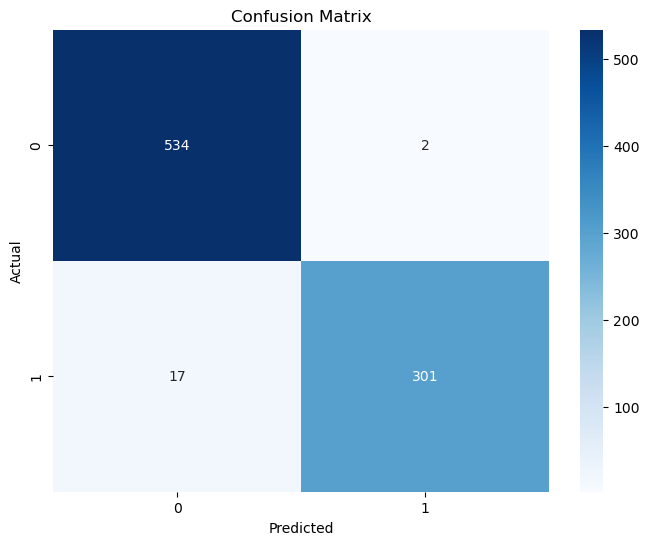

Voting ensemble Classifier Metrics:
AUC: 0.9714047686097814
Accuracy: 0.977751756440281
Precision: 0.9781777342123421
Recall: 0.977751756440281
Specificity: 0.9650577807792815
F1 Score: 0.9776365645868571
Classifier Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       536
           1       0.99      0.95      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854

----------------------------------
534 2 17 301
pod:  0.9465408805031447
pof:  0.0037313432835820895
AUC:  0.9714047686097813
accuracy:  0.977751756440281
precision:  0.9933993399339934
recall:  0.9465408805031447
specificity:  0.996268656716418
F1:  0.9694041867954911


In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
nb_clf = GaussianNB()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logistic_reg = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Create an ensemble of classifiers using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('xgb_classifier', xgb_classifier), 
    ('logistic_reg', logistic_reg)
], voting='hard')  # 'hard' for majority vote

# Train the ensemble model
ensemble_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = ensemble_classifier.predict(x_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Voting ensemble Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("Classifier Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_4269', 'RAW', 'Voting', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_4269.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

In [29]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
nb_clf = GaussianNB()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logistic_reg = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)


nb_clf.fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
random_forest.fit(x_train, y_train)
logistic_reg.fit(x_train, y_train)
svm_classifier.fit(x_train, y_train)
knn_classifier.fit(x_train, y_train)

# Make predictions
nb_predictions = nb_clf.predict(x_test)
dt_predictions = decision_tree.predict(x_test)
rf_predictions = random_forest.predict(x_test)
lr_predictions=logistic_reg.predict(x_test)
svm_predictions=svm_classifier.predict(x_test)
knn_predictions=knn_classifier.predict(x_test)
# Define weights for classifiers
nb_weight = 0.2
dt_weight = 0.0
rf_weight = 0.0
lr_weight = 0.3
svm_weight = 0.4
knn_weight = 0.1

# Ensemble prediction with weighted average
ensemble_predictions = (lr_weight * lr_predictions) + (nb_weight * nb_predictions)+(svm_weight*svm_predictions)+(knn_weight*knn_predictions)
ensemble_predictions = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]

# Evaluate accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)